<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Aula%2008%20-%20Convolu%C3%A7%C3%A3o%20Vari%C3%A1vel%20Cont%C3%ADnua%20(Willian%20de%20Vargas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Material elaborado por Willian de Vargas, com base nos materiais disponibilizados pela Professora Dra. Carla Diniz L. Becker, durante as aulas de Processamento de Sinais, ministradas para o curso de Informática Biomédica da Universidade Federal de Ciências da Saúde de Porto Alegre.

# Aula 08 - Convolução: Variável Contínua

Bibliotecas necessárias

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck
from scipy.integrate import quad

plt.style.use('ggplot')

#I. Teoria:

A Soma de Convolução para os Sinais de tempo discreto, tem a sua contrapartida para os Sinais de tempo Contínuo, que é a integral de Convolução, em que a somatória de todas as respostas ao impulso ponderadas e deslocadas no tempo para k, agora se converte em uma integral $\tau$, de $+\infty$ a $-\infty$, conforme mostrado a seguir:

$$y(t)=x(t)*h(t)=\int_{-\infty}^{+\infty} x(\tau)h(t-\tau) \,d\tau$$

A convolução é uma medida da área subentendida pelo produto da função $x(\tau)$ com uma cópia invertida no tempo de $h(\tau)$, em função da distância relativa entre elas.

**Convolução como cálculo de uma média móvel ponderada:**

Pode-se entender que a convolução consiste no cálculo do valor médio da função $h(t)$. Trata-se de uma média ponderada com pesos dados por $x(t)$.

**Observação 1:** O efeito da substituição de $\tau$ por $-\tau$ é refletir a forma de onda do sinal aplicado no eixo vertical e a substituição de $-\tau$ por $t-\tau$ implica em eslocar a forma de onda para a direita de um intervalo igual a $t$.

**Observação 2:** Não esqueça que no processo de convolução, $t$ é fixo e $\tau$ é variável!

# EXEMPLO:

Seja o sinal de um aistema dado por $h(t)=e^{-2t}u(t)$. Determine  convolução deste sinal com $x(t)=e^{-t}u(t)$

**Obs.:** A função $u(t)$ é o que chamamos de Step Function. Ela garante com que não existam amostras quando $t < 0$.

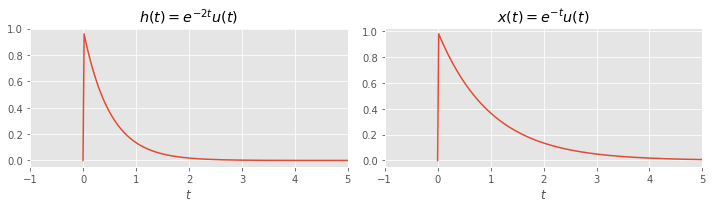

In [73]:
N = 1000 #1000 pontos
Ts = 20.0 / 1000.0 #Periodo de amostragem (distancia entre pontos)
t = Ts*np.arange(N)
u_t = np.heaviside(t,0) # Step function (garante que não haverão amostras em t<0)
h_t= np.exp(1)**(-2*t)*u_t
x_t = np.exp(1)**(-t)*u_t

plt.rcParams['figure.figsize'] = (10, 3)

plt.subplot(1,2,1)
plt.title("$h(t)=e^{-2t}u(t)$")
plt.xlabel("$t$")
plt.plot(t, h_t)
plt.xlim(-1, 5) 


plt.subplot(1,2,2)
plt.title("$x(t)=e^{-t}u(t)$")
plt.xlabel("$t$")
plt.plot(t, x_t)
plt.xlim(-1, 5) 

plt.tight_layout()
plt.show()

A partir da integral de convolução, temos:

$$y(t)=\int_{0}^{t} x(\tau)h(t-\tau) \,d\tau \text{,    }t \geq 0$$

Como $x(t)=e^{-t}u(t)$ e $h(t)=e^{-2t}u(t)$, temos o seguinte:

$$x(\tau)=e^{-t}u(\tau) \text{ e } h(t-\tau)=e^{-2(t-\tau)}u(t-\tau)$$

Lembre que a integração é calculada com relação a $\tau$ (e não $t$), e que a região de integração é $0\leq\tau\leq1$.

Logo, $\tau \geq 0$ e $t-\tau \geq 0$. Portanto, $u(\tau)=1$ e consequentemente:

$$y(t)=\int_{0}^{t} e^{-\tau}e^{-2(t-\tau)} \,d\tau \text{,    }t \geq 0$$

Como esta integração é realizada com relação a $\tau$, podemos colocar $e^{-2t}$ para fora da integral, resultando em:

$$y(t)=e^{-2t}\int_{0}^{t} e^{-\tau}e^{-2(-\tau)} \,d\tau = e^{-2t}\int_{0}^{t} e^{-\tau}e^{2\tau} \,d\tau =  e^{-2t}\int_{0}^{t} e^{\tau}\,d\tau = e^{-2t}(e^t-1) = e^{-t}-e^{-2t}\text{,    }t \geq 0$$


### Determine graficamente $y(t)=x(t)*h(t)$ para $x(t)=e^{-t}u(t)$ e $h(t)=e^{-2t}u(t)$.

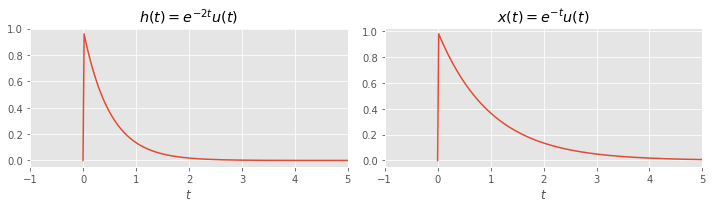

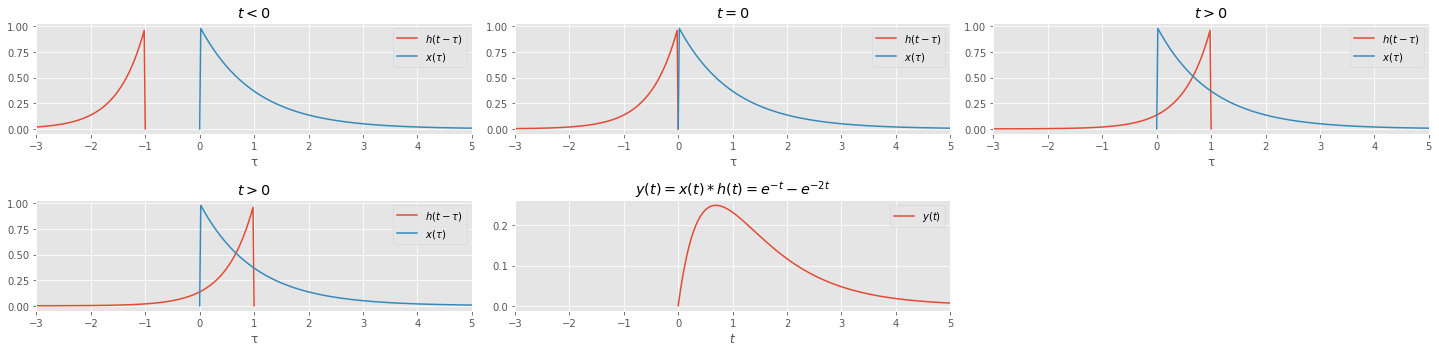

In [105]:
N = 1000 #1000 pontos
Ts = 20.0 / 1000.0 #Periodo de amostragem (distancia entre pontos)
t = Ts*np.arange(N)
u_t = np.heaviside(t,0) # Step function (garante que não haverão amostras em t<0)
h_t= np.exp(1)**(-2*t)*u_t
x_t = np.exp(1)**(-t)*u_t
y_t=np.exp(1)**(-t)-np.exp(1)**(-2*t)

plt.rcParams['figure.figsize'] = (10, 3)

plt.subplot(121)
plt.title("$h(t)=e^{-2t}u(t)$")
plt.xlabel("$t$")
plt.plot(t, h_t)
plt.xlim(-1, 5) 

plt.subplot(122)
plt.title("$x(t)=e^{-t}u(t)$")
plt.xlabel("$t$")
plt.plot(t, x_t)
plt.xlim(-1, 5) 

plt.tight_layout()
plt.show()

plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(231)
plt.title("$t<0$")
plt.xlabel("τ")
plt.plot(-1-t, h_t, label="$h(t-τ)$")
plt.plot(t, x_t, label="$x(τ)$")
plt.xlim(-3, 5) 
plt.legend(loc = "upper right", )

plt.subplot(232)
plt.title("$t=0$")
plt.xlabel("τ")
plt.plot(-t, h_t, label="$h(t-τ)$")
plt.plot(t, x_t, label="$x(τ)$")
plt.xlim(-3, 5) 
plt.legend(loc = "upper right")

plt.subplot(233)
plt.title("$t>0$")
plt.xlabel("τ")
plt.plot(1-t, h_t, label="$h(t-τ)$")
plt.plot(t, x_t, label="$x(τ)$")
plt.xlim(-3, 5) 
plt.legend(loc = "upper right")

plt.subplot(234)
plt.title("$t>0$")
plt.xlabel("τ")
plt.plot(1-t, h_t, label="$h(t-τ)$")
plt.plot(t, x_t, label="$x(τ)$")
plt.xlim(-3, 5) 
plt.legend(loc = "upper right")

plt.subplot(235)
plt.title("$y(t)=x(t)*h(t)=e^{-t}-e^{-2t}$")
plt.xlabel("$t$")
plt.plot(t, y_t, label="$y(t)$")
plt.xlim(-3, 5) 
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

### Resumo do procedimento Gráfico:

1. Mantenha a função $x(\tau)$ fixa.
2. Visualize a função $h(\tau)$ como um objeto rígido e o rotacione (ou inverta) em relação ao eixo vertica $(\tau=0)$ para obter $h(-\tau)$.
3. Desloque a função invertida ao longo do eixo $\tau$ por $t_0$ segundos. A figura deslocada agora representa $h(t_0-\tau)$.
4. A área debaixo do produto de $x(\tau)$ com $h(t_0-\tau)$ (figura deslocada) é $y(t_0)$, o valor da convolução para $t=t_0$.
5. Repita este procedimento deslocando a figura por diferentes valores (positivos e negativos) para obter $y(t)$ para todos os valores de $t$.

**Na convolução gráfica é preciso determinar a área sob o produto:**

$x(\tau)h(t-\tau)$ para todos os valores de $t$, de $-\infty$ a $+\infty$. Entretanto a descrição matemática de $x(\tau)h(t-\tau)$ é, geralmente, válida somente para uma faixa de $t$.Portanto, a repetição do procedimento para qualquer valor de $t$ resulta em repeti-lo apenas algumas vezes para diferentes faixas de $t$.